### Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data csv ke **DataFrame**

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Understanding

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Disini diketahui bahwa data tidak memiliki missing values. Data terbagi menjadi data categorical dan numerical.

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Age (Usia):
Rata-rata usia nasabah adalah sekitar 40 tahun, dengan rentang usia antara 18 hingga 95 tahun.
Sebagian besar nasabah berada di rentang usia antara 33 hingga 48 tahun, dengan kuartil pertama (25%) berada di usia 33 tahun dan kuartil ketiga (75%) berada di usia 48 tahun.

- Balance (Saldo):
Rata-rata saldo nasabah adalah sekitar 1362 unit, dengan rentang saldo yang sangat bervariasi, mulai dari negatif hingga lebih dari 100.000 unit.
Sebagian besar nasabah memiliki saldo yang relatif kecil, dengan nilai saldo kuartil pertama (25%) hanya sebesar 72 unit.

- Day (Hari):
Hari dalam bulan ketika kontak terakhir dilakukan berkisar dari 1 hingga 31.
Data menunjukkan bahwa kontak dilakukan sepanjang bulan, dengan tidak ada nilai yang mendominasi.

- Campaign (Kampanye):
Jumlah kontak kampanye yang dilakukan berkisar dari 1 hingga 63.
Sebagian besar nasabah menerima jumlah kontak yang relatif sedikit, dengan nilai kuartil pertama (25%) hanya sebesar 1.

- Pdays (Hari Terakhir Dicontact sejak Terakhir):
Jumlah hari yang telah berlalu sejak nasabah terakhir kali dihubungi berkisar dari -1 hingga lebih dari 800.
Nilai -1 menunjukkan bahwa nasabah belum pernah dihubungi sebelumnya, sedangkan nilai-nilai positif menunjukkan jumlah hari sejak kontak terakhir.

- Previous (Kontak Sebelumnya):
Jumlah kontak yang telah dilakukan sebelum kampanye saat ini berkisar dari 0 hingga 275.
Sebagian besar nasabah tidak memiliki kontak sebelumnya, dengan nilai kuartil pertama (25%) dan median (50%) adalah 0. Namun, ada sejumlah kecil nasabah yang memiliki jumlah kontak sebelumnya yang tinggi.-

### Exploratory Data Analysis (EDA)

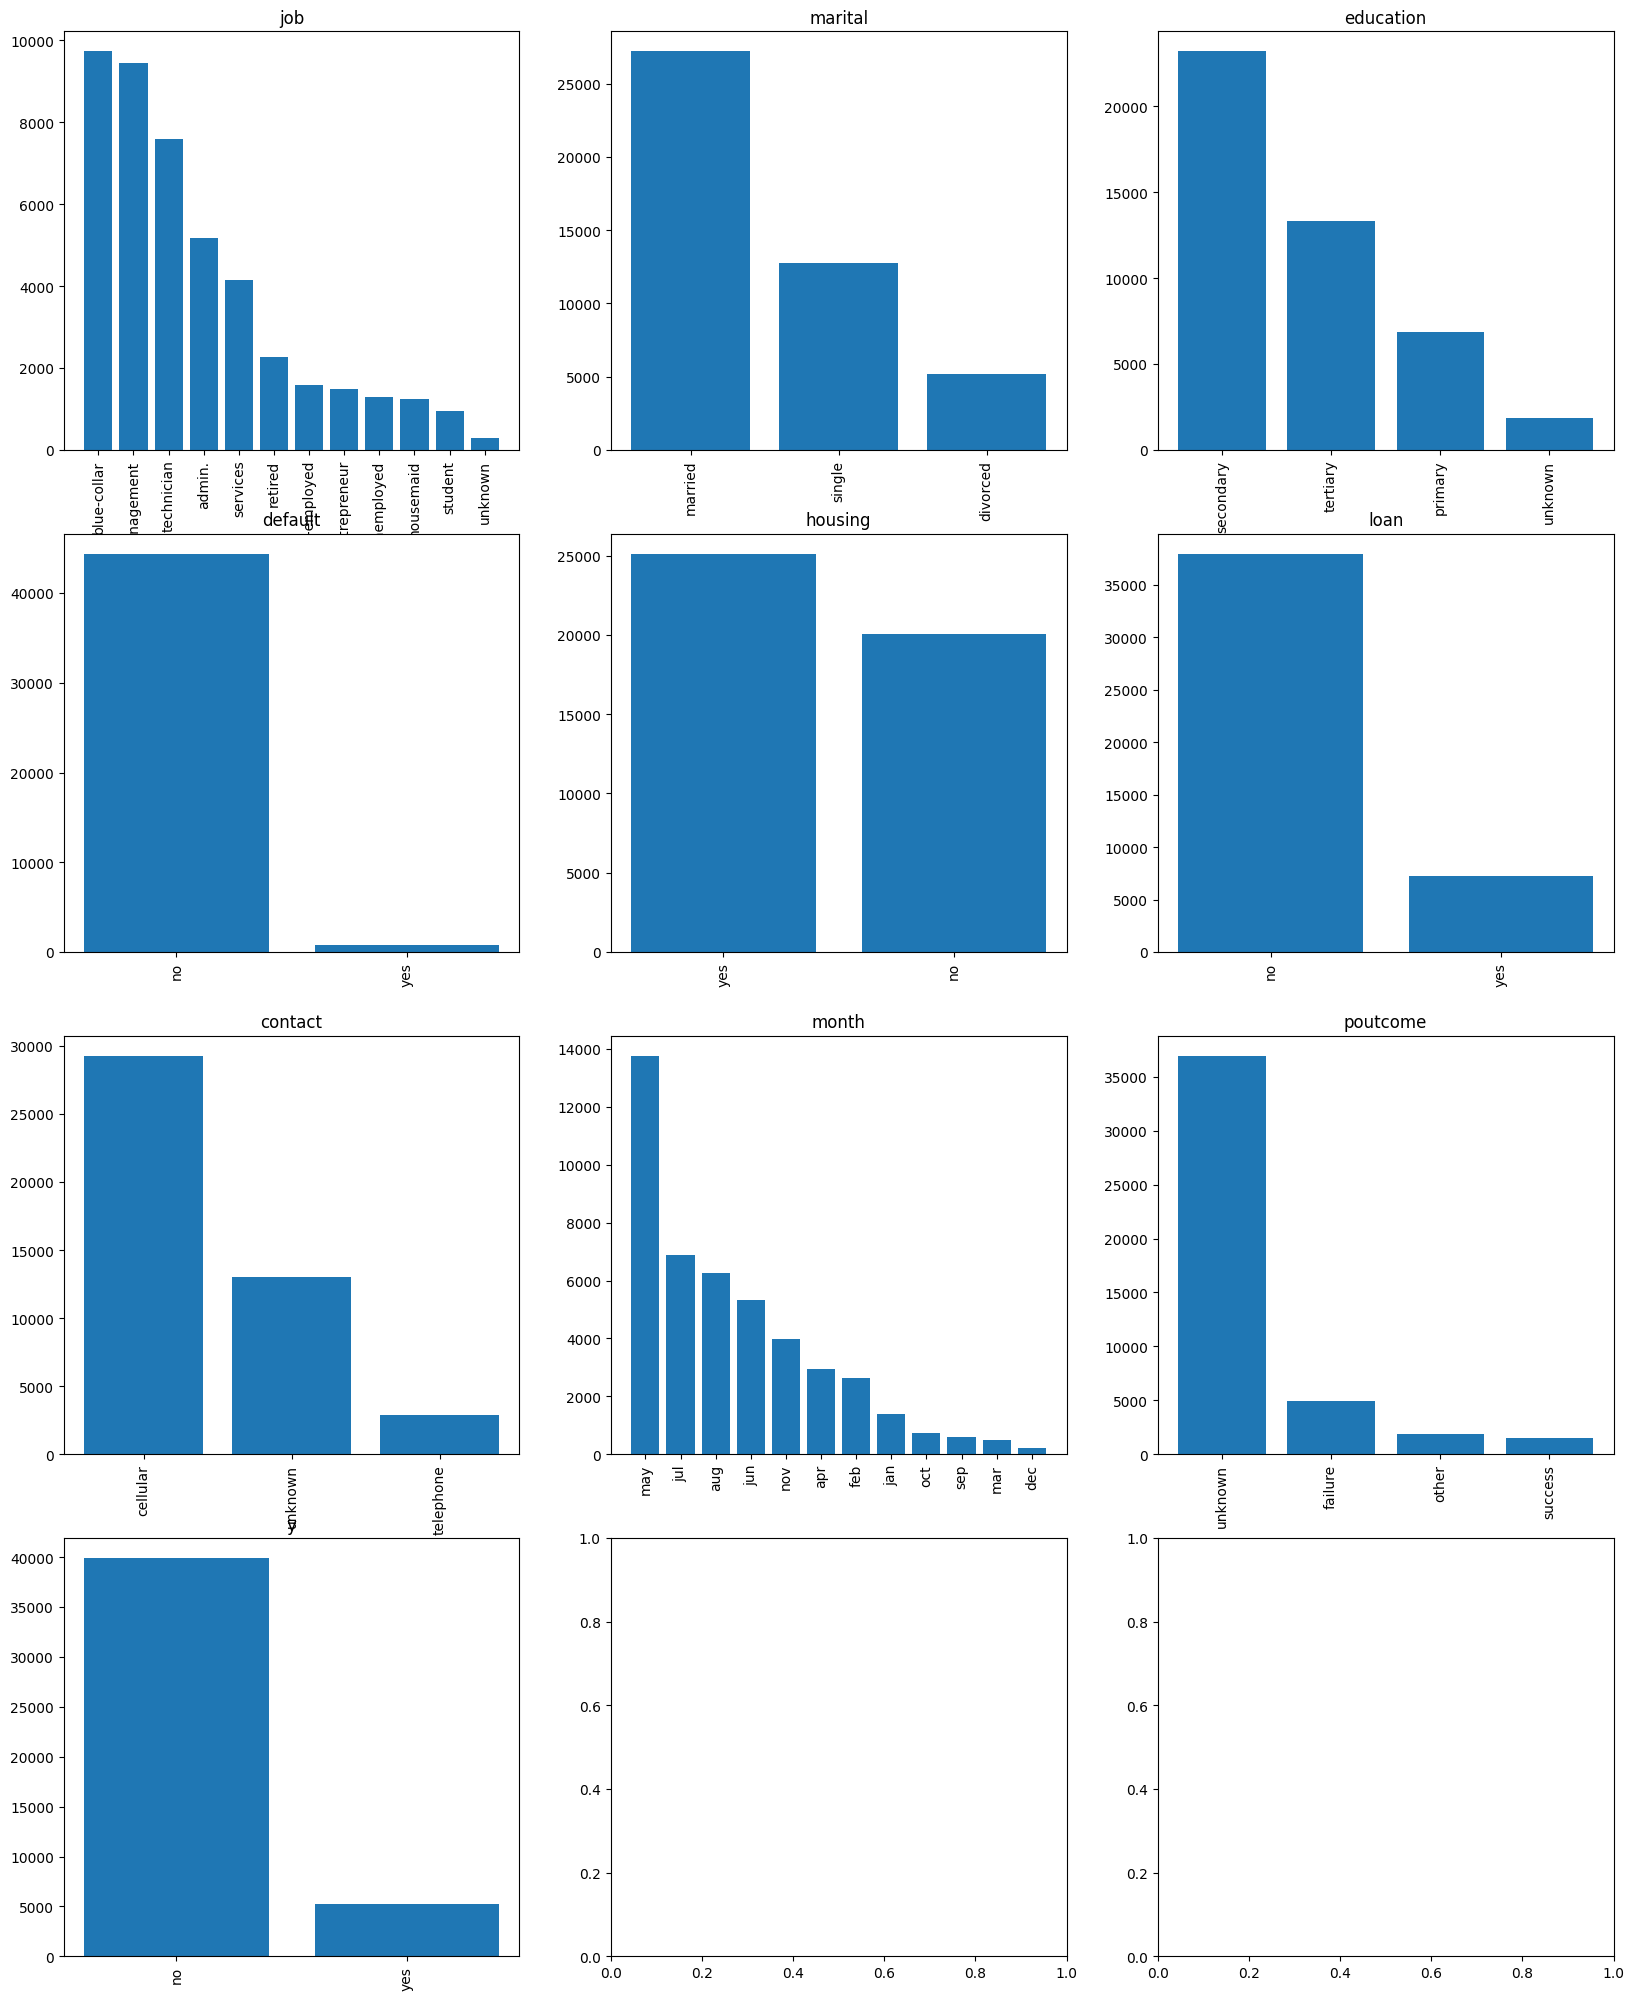

In [5]:
# Visualisasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.drop('y')

# Menghitung jumlah subplot yang diperlukan
cat_plots = len(categorical_cols)
cat_rows = (cat_plots - 1) // 3 + 1
cat_cols = min(cat_plots, 3)

fig, axs = plt.subplots(cat_rows, cat_cols, sharex=False, sharey=False, figsize=(20, 25))

counter = 0
for categorical_col in categorical_cols:
    value_counts = df[categorical_col].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(categorical_col)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

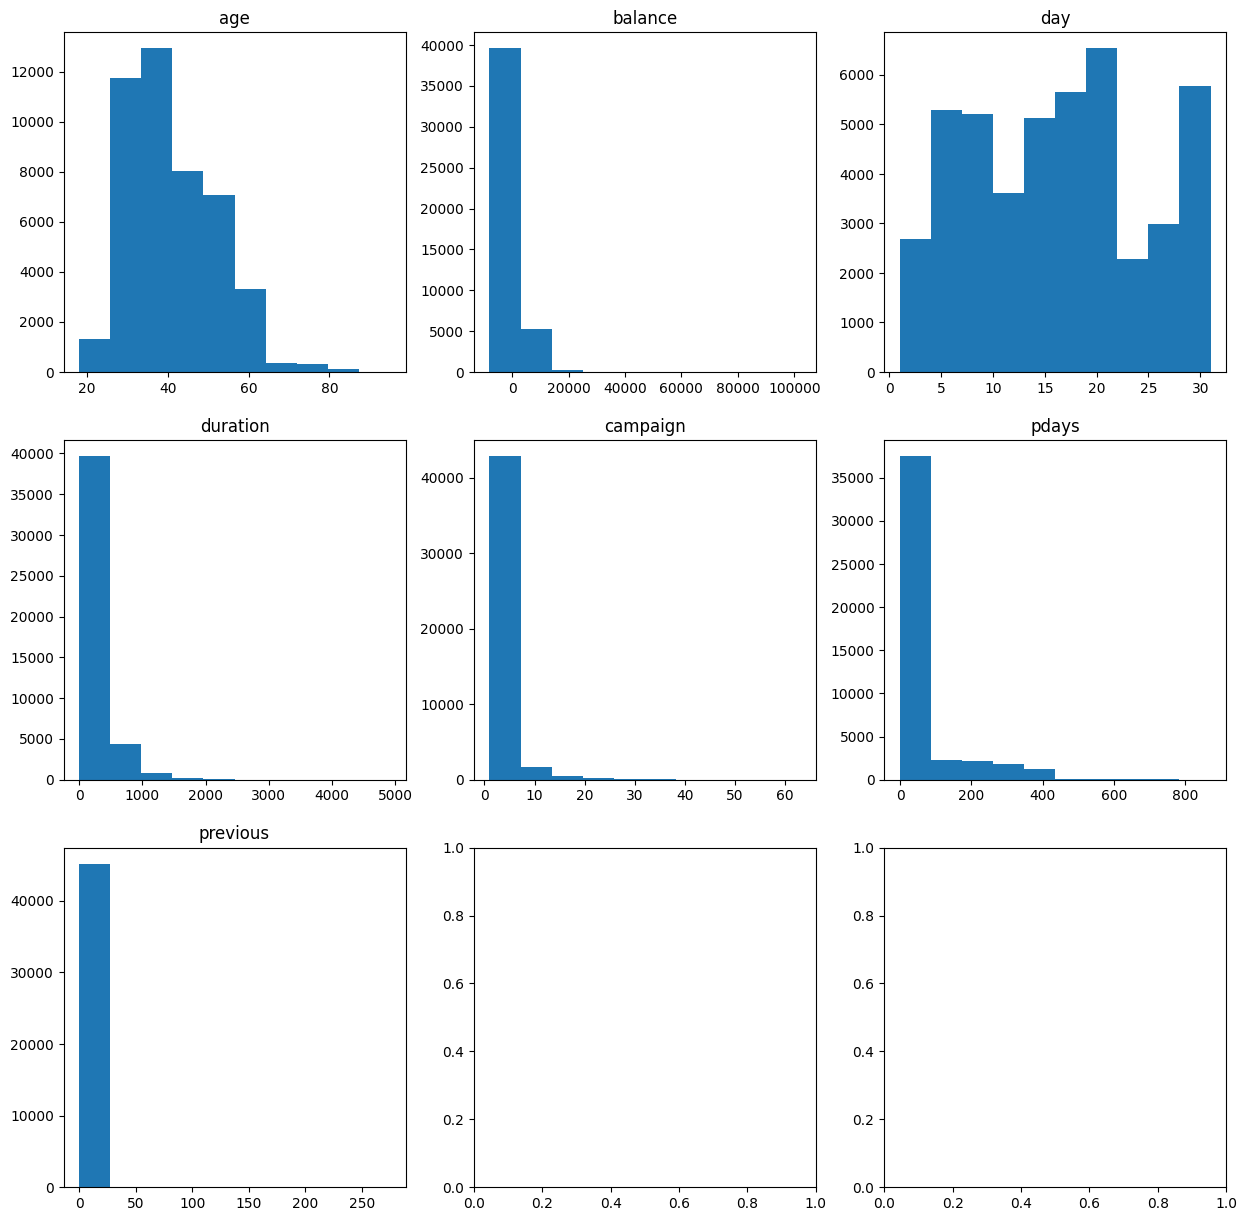

In [6]:
# Visualisasi kolom numerik
numeric_cols = df.select_dtypes(include=['int64']).columns

# Menghitung jumlah subplot yang diperlukan
num_plots = len(numeric_cols)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

fig, axs = plt.subplots(num_rows, num_cols, sharex=False, sharey=False, figsize=(15, 15))

counter = 0
for numeric_col in numeric_cols:
    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[numeric_col])
    axs[trace_x, trace_y].set_title(numeric_col)

    counter += 1
plt.show()

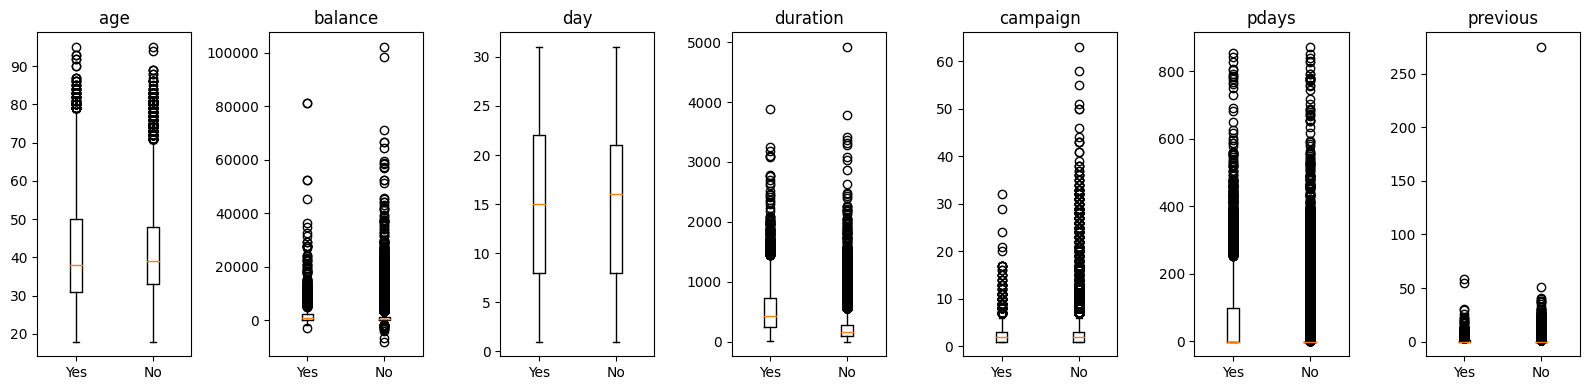

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64']).columns

# Split data menjadi dua dataframes berdasarkan kelas target
yes_df = df[df['y'] == 'yes']
no_df = df[df['y'] == 'no']

plt.figure(figsize=(16, 4))
for i, col in enumerate(df.select_dtypes(include=['int64']).columns):
    plt.subplot(1, len(df.select_dtypes(include=['int64']).columns), i + 1)
    yes_data = df[df['y'] == 'yes'][col]
    no_data = df[df['y'] == 'no'][col]
    plt.boxplot([yes_data, no_data], labels=['Yes', 'No'])
    plt.title(col)
plt.tight_layout()
plt.show()


Beberapa kolom seperti 'age', 'balance', 'duration', 'campaign', 'pdays', dan 'previous' memiliki distribusi yang tidak merata dan mengindikasikan adanya outlier. Ini akan ditangani menggunakan teknik winsorize.

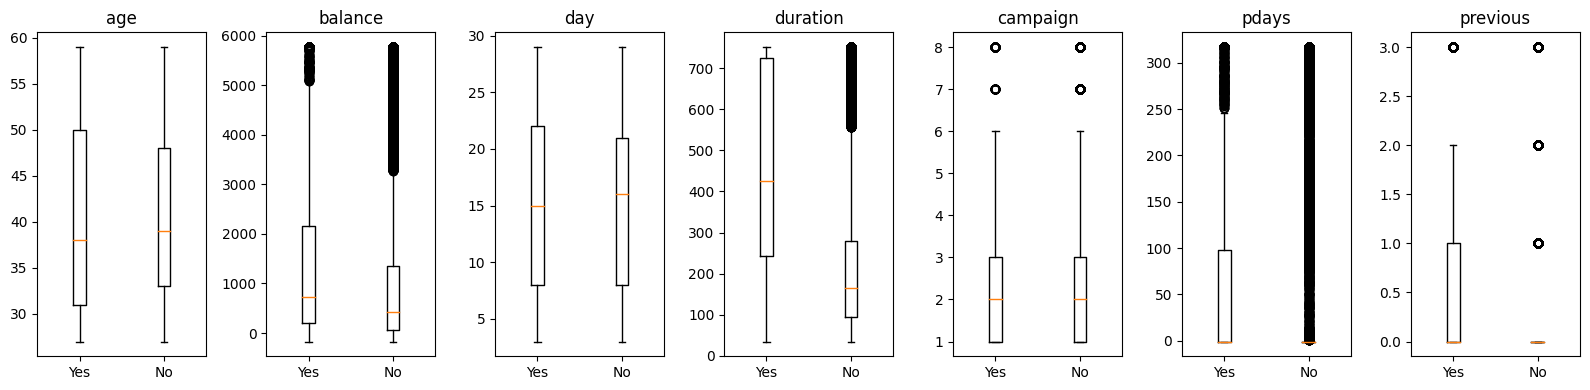

In [8]:
from scipy.stats.mstats import winsorize

# Winsorization untuk mengatasi outlier
numeric_cols = df.select_dtypes(include=['int64']).columns
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Plotting box plot setelah mengatasi outlier
plt.figure(figsize=(16, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    yes_data = df[df['y'] == 'yes'][col]
    no_data = df[df['y'] == 'no'][col]
    plt.boxplot([yes_data, no_data], labels=['Yes', 'No'])
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Deposit value counts'}>

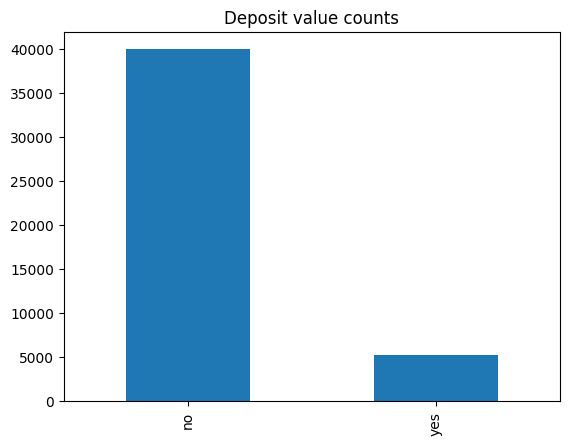

In [9]:
# Visualisasi kolom target
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

Diagram tersebut menunjukkan jumlah yang tidak seimbang antara kelas 'no' dan 'yes' pada data target. Ini akan ditangani menggunakan undersampling.

### Analisis kolom dengan target

management       24.598223
technician       15.882019
blue-collar      13.386273
admin.           11.930422
retired           9.756098
services          6.976744
student           5.086028
unemployed        3.819247
self-employed     3.535640
entrepreneur      2.325581
housemaid         2.060881
unknown           0.642844
Name: yes, dtype: float64
management       20.432343
technician       16.925505
blue-collar      22.604078
admin.           11.372176
retired           4.378538
services          9.480988
student           1.675768
unemployed        2.757878
self-employed     3.486799
entrepreneur      3.416662
housemaid         2.833024
unknown           0.636241
Name: no, dtype: float64


<Axes: title={'center': 'Job and deposit'}>

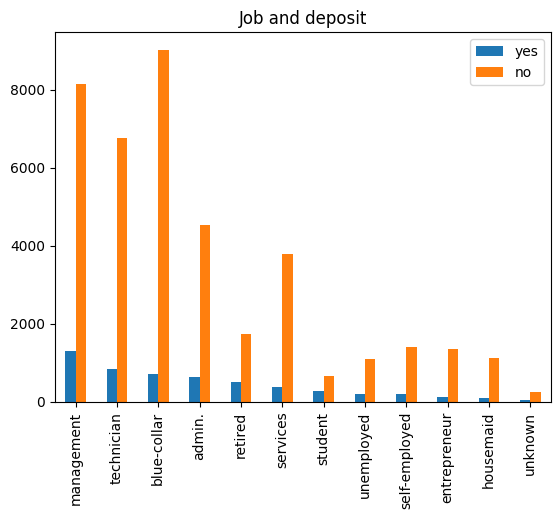

In [10]:
# job and deposit
job_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['job'].count()
total_no = df[df['y'] == 'no']['job'].count()

job_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['y'] == 'no']['job'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
job_yes_percentage = (job_df['yes'] / total_yes) * 100
job_no_percentage = (job_df['no'] / total_no) * 100

print(job_yes_percentage)
print(job_no_percentage)

job_df.plot.bar(title = 'Job and deposit')

Kategori pekerjaan "management" dan "admin" memiliki kemungkinan untuk mendaftar deposit berjangka. Persentase "yes" untuk kedua kategori ini lebih tinggi daripada persentase "no".

married     52.089242
single      36.150501
divorced    11.760257
Name: yes, dtype: float64
married     61.266971
single      27.248134
divorced    11.484896
Name: no, dtype: float64


<Axes: title={'center': 'Marital status and deposit'}>

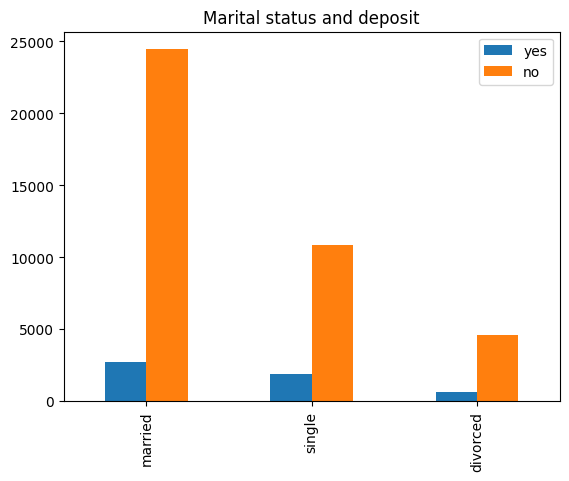

In [11]:
# marital status and deposit
marital_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['marital'].count()
total_no = df[df['y'] == 'no']['marital'].count()

marital_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
marital_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
marital_yes_percentage = (marital_df['yes'] / total_yes) * 100
marital_no_percentage = (marital_df['no'] / total_no) * 100

print(marital_yes_percentage)
print(marital_no_percentage)

marital_df.plot.bar(title = 'Marital status and deposit')

 Kategori status pernikahan yang kemungkinan memiliki target "yes" yang lebih tinggi adalah single. Persentase "yes" untuk status perkawinan "single" adalah 36.150501%, sedangkan persentase "no" hanya 27.248134%.

secondary    46.322556
tertiary     37.738703
primary      11.174135
unknown       4.764606
Name: yes, dtype: float64
secondary    51.981364
tertiary     28.317720
primary      15.680577
unknown       4.020340
Name: no, dtype: float64


<Axes: title={'center': 'Education and deposit'}>

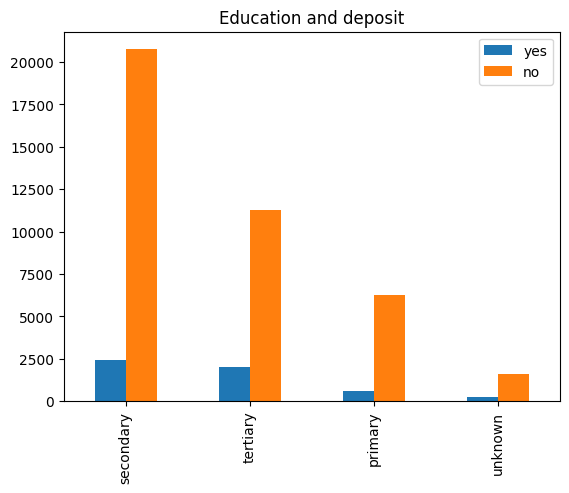

In [12]:
# education and deposit
education_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['education'].count()
total_no = df[df['y'] == 'no']['education'].count()

education_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
education_df['no'] = df[df['y'] == 'no']['education'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
education_yes_percentage = (education_df['yes'] / total_yes) * 100
education_no_percentage = (education_df['no'] / total_no) * 100

print(education_yes_percentage)
print(education_no_percentage)

education_df.plot.bar(title = 'Education and deposit')

Berdasarkan data yang diberikan, kategori tingkat pendidikan yang kemungkinan memiliki target "yes" yang lebih tinggi adalah tertiary. Persentase "yes" untuk tingkat pendidikan "tertiary" adalah 37.738703%, sedangkan persentase "no" hanya 28.317720%.

cellular     82.605407
unknown      10.020798
telephone     7.373795
Name: yes, dtype: float64
cellular     62.411703
unknown      31.286008
telephone     6.302289
Name: no, dtype: float64


<Axes: title={'center': 'Type of contact and deposit'}>

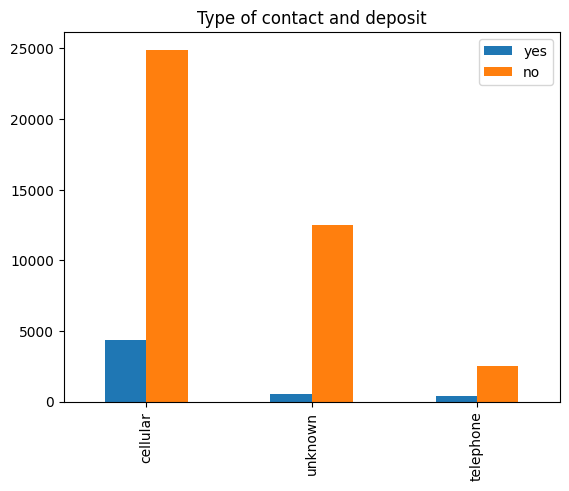

In [13]:
# type of contact and deposit
contact_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['contact'].count()
total_no = df[df['y'] == 'no']['contact'].count()

contact_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
contact_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
contact_yes_percentage = (contact_df['yes'] / total_yes) * 100
contact_no_percentage = (contact_df['no'] / total_no) * 100

print(contact_yes_percentage)
print(contact_no_percentage)

contact_df.plot.bar(title = 'Type of contact and deposit')

Berdasarkan data yang diberikan, kategori jenis komunikasi yang kemungkinan memiliki target "yes" yang lebih tinggi adalah cellular. Oleh karena itu, menggunakan jenis komunikasi "cellular" lebih mungkin untuk menghasilkan nilai "yes" dalam target dibandingkan dengan jenis komunikasi lainnya.

no     63.414634
yes    36.585366
Name: yes, dtype: float64
no     41.899203
yes    58.100797
Name: no, dtype: float64


<Axes: title={'center': 'Type of housing and deposit'}>

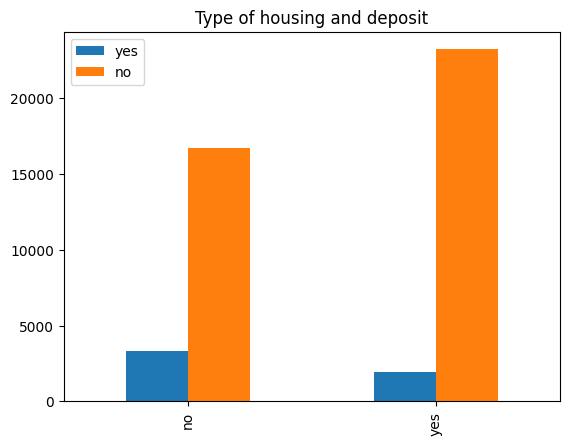

In [14]:
# type of housing and deposit
housing_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['housing'].count()
total_no = df[df['y'] == 'no']['housing'].count()

housing_df['yes'] = df[df['y'] == 'yes']['housing'].value_counts()
housing_df['no'] = df[df['y'] == 'no']['housing'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
housing_yes_percentage = (housing_df['yes'] / total_yes) * 100
housing_no_percentage = (housing_df['no'] / total_no) * 100

print(housing_yes_percentage)
print(housing_no_percentage)

housing_df.plot.bar(title = 'Type of housing and deposit')

Berdasarkan data yang diberikan, kategori status kepemilikan rumah yang kemungkinan memiliki target "yes" yang lebih tinggi adalah no. Oleh karena itu, individu yang tidak memiliki pinjaman rumah lebih mungkin untuk menghasilkan nilai "yes" dalam target dibandingkan dengan individu yang memiliki pinjaman rumah.

no     90.848932
yes     9.151068
Name: yes, dtype: float64
no     83.066981
yes    16.933019
Name: no, dtype: float64


<Axes: title={'center': 'Type of loan and deposit'}>

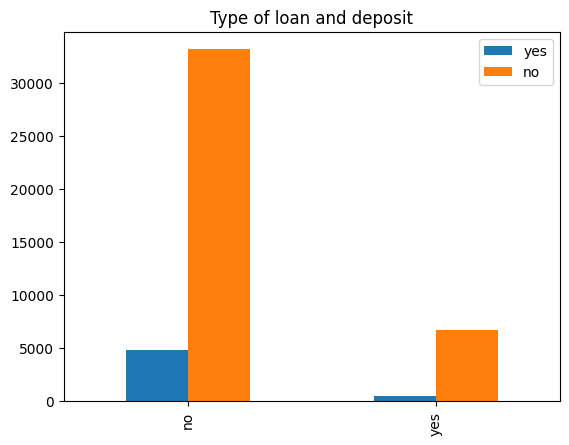

In [15]:
# type of loan and deposit
loan_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['loan'].count()
total_no = df[df['y'] == 'no']['loan'].count()

loan_df['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
loan_df['no'] = df[df['y'] == 'no']['loan'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
loan_yes_percentage = (loan_df['yes'] / total_yes) * 100
loan_no_percentage = (loan_df['no'] / total_no) * 100

print(loan_yes_percentage)
print(loan_no_percentage)

loan_df.plot.bar(title = 'Type of loan and deposit')

Berdasarkan data yang diberikan, kategori status pinjaman pribadi yang kemungkinan memiliki target "yes" yang lebih tinggi adalah no. Oleh karena itu, individu yang tidak memiliki pinjaman pribadi lebih mungkin untuk menghasilkan nilai "yes" dalam target dibandingkan dengan individu yang memiliki pinjaman pribadi.

no     99.016827
yes     0.983173
Name: yes, dtype: float64
no     98.088773
yes     1.911227
Name: no, dtype: float64


<Axes: title={'center': 'Type of default and deposit'}>

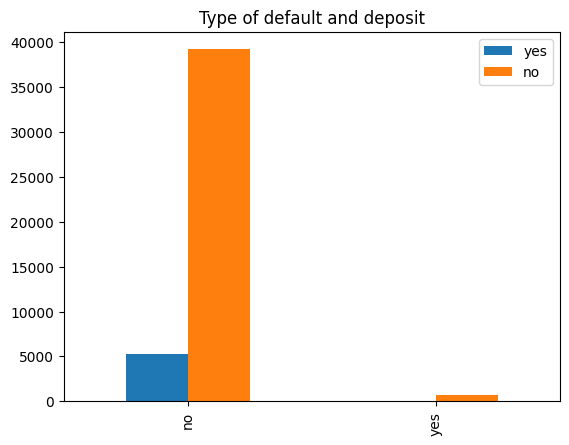

In [16]:
# type of default and deposit
default_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['default'].count()
total_no = df[df['y'] == 'no']['default'].count()

default_df['yes'] = df[df['y'] == 'yes']['default'].value_counts()
default_df['no'] = df[df['y'] == 'no']['default'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
default_yes_percentage = (default_df['yes'] / total_yes) * 100
default_no_percentage = (default_df['no'] / total_no) * 100

print(default_yes_percentage)
print(default_no_percentage)

default_df.plot.bar(title = 'Type of default and deposit')

Berdasarkan data yang diberikan, kategori status kredit dalam default yang kemungkinan memiliki target "yes" yang lebih tinggi adalah no. Oleh karena itu, individu yang tidak memiliki kredit dalam default lebih mungkin untuk menghasilkan nilai "yes" dalam target dibandingkan dengan individu yang memiliki kredit dalam default.

unknown    64.019663
success    18.491208
failure    11.684628
other       5.804500
Name: yes, dtype: float64
unknown    84.096488
success     1.335103
failure    10.728420
other       3.839988
Name: no, dtype: float64


<Axes: title={'center': 'Type of poutcome and deposit'}>

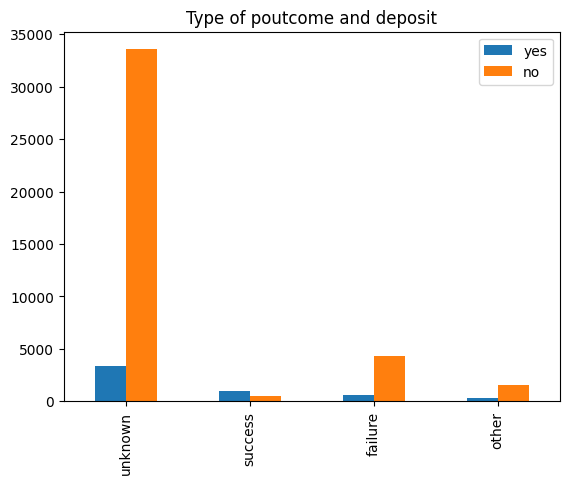

In [17]:
# type of poutcome and deposit
poutcome_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['poutcome'].count()
total_no = df[df['y'] == 'no']['poutcome'].count()

poutcome_df['yes'] = df[df['y'] == 'yes']['poutcome'].value_counts()
poutcome_df['no'] = df[df['y'] == 'no']['poutcome'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
poutcome_yes_percentage = (poutcome_df['yes'] / total_yes) * 100
poutcome_no_percentage = (poutcome_df['no'] / total_no) * 100

print(poutcome_yes_percentage)
print(poutcome_no_percentage)

poutcome_df.plot.bar(title = 'Type of poutcome and deposit')

Berdasarkan data yang diberikan, kategori hasil kampanye pemasaran sebelumnya yang kemungkinan memiliki target "yes" yang lebih tinggi adalah success. Oleh karena itu, individu yang hasil kampanye pemasaran sebelumnya berhasil (success) lebih mungkin untuk menghasilkan nilai "yes" dalam target dibandingkan dengan kategori lainnya.

may    17.489128
aug    13.008130
jul    11.854793
apr    10.909435
jun    10.323313
feb     8.338060
nov     7.619588
oct     6.107015
sep     5.086028
mar     4.688977
jan     2.684818
dec     1.890717
Name: yes, dtype: float64
may    32.165222
aug    13.924653
jul    15.700616
apr     5.899003
jun    12.010921
feb     5.530785
nov     8.934923
oct     1.039527
sep     0.776514
mar     0.573619
jan     3.158659
dec     0.285557
Name: no, dtype: float64


<Axes: title={'center': 'Type of month and deposit'}>

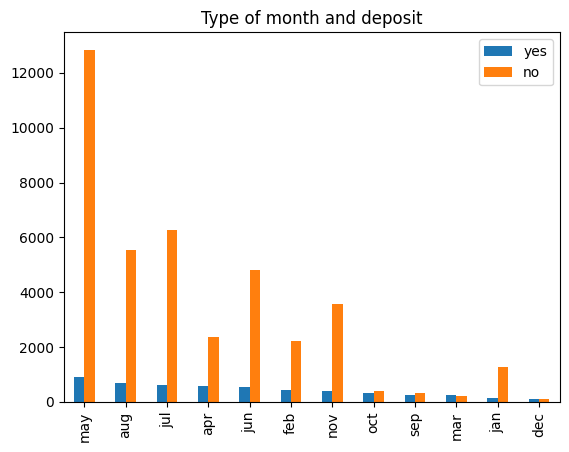

In [18]:
# type of month and deposit
month_df = pd.DataFrame()

total_yes = df[df['y'] == 'yes']['month'].count()
total_no = df[df['y'] == 'no']['month'].count()

month_df['yes'] = df[df['y'] == 'yes']['month'].value_counts()
month_df['no'] = df[df['y'] == 'no']['month'].value_counts()

# Menghitung proporsi atau persentase untuk setiap kategori pekerjaan
month_yes_percentage = (month_df['yes'] / total_yes) * 100
month_no_percentage = (month_df['no'] / total_no) * 100

print(month_yes_percentage)
print(month_no_percentage)

month_df.plot.bar(title = 'Type of month and deposit')

Berdasarkan data yang diberikan, bulan dengan kemungkinan target "yes" yang lebih tinggi adalah bulan May (Mei). Ini menunjukkan bahwa pelanggan yang dihubungi pada bulan Mei cenderung lebih mungkin untuk menghasilkan "yes" dalam target dibandingkan dengan bulan-bulan lainnya.

## Data Preparation

Untuk fitur numerik akan dilakukan scaling menggunakan StandardScaler, sedangkan fitur kategorikal akan dilakukan one-hot encoding menggunakan OneHotEncoder

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur kategorikal dan numerik
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('y')
numeric_cols = df.select_dtypes(include=['int64']).columns

# One-hot encoding pada fitur kategorikal
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Membuat DataFrame baru dari data yang telah diencode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Standarisasi pada fitur numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Membuat DataFrame baru dari data yang telah di-standarisasi
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Menggabungkan semua fitur
df = pd.concat([encoded_df, scaled_df, df['y']], axis=1)

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.777222,0.648845,-1.324169,0.097886,-0.793438,-0.426599,-0.429644,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.333660,-0.688042,-1.324169,-0.475486,-0.793438,-0.426599,-0.429644,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.800567,-0.705116,-1.324169,-0.866422,-0.793438,-0.426599,-0.429644,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.642995,0.246008,-1.324169,-0.783022,-0.793438,-0.426599,-0.429644,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.800567,-0.705749,-1.324169,-0.230500,-0.793438,-0.426599,-0.429644,no


Melakukan Label Encoding pada kolom target 'y'. Yaitu mengubah 'yes' menjadi 0 dan 'no' menjadi 1

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Melakukan label encoding pada target 'y'
df['y'] = label_encoder.fit_transform(df['y'])

df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.777222,0.648845,-1.324169,0.097886,-0.793438,-0.426599,-0.429644,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.333660,-0.688042,-1.324169,-0.475486,-0.793438,-0.426599,-0.429644,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.800567,-0.705116,-1.324169,-0.866422,-0.793438,-0.426599,-0.429644,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.642995,0.246008,-1.324169,-0.783022,-0.793438,-0.426599,-0.429644,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.800567,-0.705749,-1.324169,-0.230500,-0.793438,-0.426599,-0.429644,0


In [21]:
df.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,...,45211.000000,45211.000000,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000
mean,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,...,0.033421,0.817478,3.545563e-16,6.537917e-17,1.445886e-17,7.543751e-18,-5.029167e-18,6.035001e-17,-4.023334e-17,0.116985
std,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,...,0.179735,0.386278,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,-1.419236e+00,-8.151534e-01,-1.569700e+00,-1.080133e+00,-7.934379e-01,-4.265992e-01,-4.296439e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,-8.005668e-01,-6.608487e-01,-9.558731e-01,-7.256848e-01,-7.934379e-01,-4.265992e-01,-4.296439e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,-1.818975e-01,-4.230675e-01,2.624964e-02,-3.243243e-01,-2.685082e-01,-4.265992e-01,-4.296439e-01,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,7.461066e-01,1.966811e-01,6.400763e-01,4.002097e-01,2.564215e-01,-4.265992e-01,-4.296439e-01,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.880334e+00,2.941282e+00,1.622199e+00,2.651999e+00,2.881070e+00,3.092238e+00,2.974006e+00,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_admin.           45211 non-null  float64
 1   job_blue-collar      45211 non-null  float64
 2   job_entrepreneur     45211 non-null  float64
 3   job_housemaid        45211 non-null  float64
 4   job_management       45211 non-null  float64
 5   job_retired          45211 non-null  float64
 6   job_self-employed    45211 non-null  float64
 7   job_services         45211 non-null  float64
 8   job_student          45211 non-null  float64
 9   job_technician       45211 non-null  float64
 10  job_unemployed       45211 non-null  float64
 11  job_unknown          45211 non-null  float64
 12  marital_divorced     45211 non-null  float64
 13  marital_married      45211 non-null  float64
 14  marital_single       45211 non-null  float64
 15  education_primary    45211 non-null 

Distribusi kelas pada target tidak seimbang, sehingga dilakukan undersampling

In [23]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [24]:
from sklearn.utils import resample

# Memisahkan data menjadi kelas mayoritas dan minoritas
df_majority = df[df['y'] == 0]
df_minority = df[df['y'] == 1]

# Melakukan undersampling pada kelas mayoritas
undersampled_majority = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df = pd.concat([df_minority, undersampled_majority])

df['y'].value_counts()

1    5289
0    5289
Name: y, dtype: int64

Split train dan test data dengan persentase 80% train dan 20% test data. Dipastikan juga bahwa jumlah distribusi kelas pada training dan testing sama, yaitu 50%.

In [25]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data train dan data test dengan proporsi yang sama dengan Stratified Shuffle Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.2, random_state=42, stratify=df['y'])

print("Proportion of target in train set:")
print(y_train.value_counts() / len(y_train))

print("\nProportion of target in test set:")
print(y_test.value_counts() / len(y_test))


Proportion of target in train set:
1    0.5
0    0.5
Name: y, dtype: float64

Proportion of target in test set:
1    0.5
0    0.5
Name: y, dtype: float64


## Data Modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost


dict_classifiers = {
     "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "xgb": xgboost.XGBClassifier()
}

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi dictionary untuk menyimpan hasil akurasi
accuracy_results = {}

# Melakukan iterasi pada setiap model dan mengukur akurasi
for classifier_name, classifier in dict_classifiers.items():
    # Training model
    classifier.fit(X_train, y_train)

    # Prediksi pada data train
    train_pred = classifier.predict(X_train)

    # Prediksi pada data test
    test_pred = classifier.predict(X_test)

    # Mengukur akurasi pada data train dan data test
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Menampilkan laporan klasifikasi
    print(f"Classifier: {classifier_name}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report on Test Data:")
    print(classification_report(y_test, test_pred))
    print()

    # Menyimpan hasil akurasi
    accuracy_results[classifier_name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

Classifier: Logistic Regression
Train Accuracy: 0.8318
Test Accuracy: 0.8417
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1058
           1       0.84      0.85      0.84      1058

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116


Classifier: Linear SVM
Train Accuracy: 0.8737
Test Accuracy: 0.8620
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1058
           1       0.84      0.90      0.87      1058

    accuracy                           0.86      2116
   macro avg       0.86      0.86      0.86      2116
weighted avg       0.86      0.86      0.86      2116


Classifier: Decision Tree
Train Accuracy: 1.0000
Test Accuracy: 0.7968
Classification Report on Test Data:
              precis


Berdasarkan hasil evaluasi tersebut, berikut adalah kesimpulan yang didapat:

- Logistic Regression: Model ini memiliki akurasi yang cukup baik di atas 80%. Precision, recall, dan f1-score untuk kelas positif (1) dan negatif (0) juga cukup seimbang, menunjukkan kinerja yang stabil.

- Linear SVM: Model ini memberikan akurasi yang tinggi, sedikit lebih baik dari Logistic Regression. Precision, recall, dan f1-score untuk kelas positif (1) dan negatif (0) juga cukup seimbang, menunjukkan kinerja yang stabil.

- Decision Tree: Meskipun model Decision Tree memiliki akurasi yang cukup tinggi, namun terdapat sedikit overfitting karena akurasi pada data train mencapai 100%. Selain itu, precision, recall, dan f1-score untuk kedua kelas cenderung seimbang, menunjukkan bahwa model ini dapat melakukan klasifikasi dengan baik.

- Random Forest: Model Random Forest memberikan akurasi yang baik dan cenderung mengurangi overfitting yang terjadi pada Decision Tree karena penggunaan ensemble learning. Precision, recall, dan f1-score untuk kedua kelas juga cukup seimbang, menunjukkan kinerja yang baik.

- XGBoost: XGBoost merupakan model terbaik dari semua model yang dievaluasi. Model ini memberikan akurasi yang tinggi dan kinerja yang stabil dengan precision, recall, dan f1-score yang seimbang untuk kedua kelas.

Dengan demikian, berdasarkan hasil evaluasi, dapat disimpulkan bahwa XGBoost adalah model terbaik untuk tugas klasifikasi ini, diikuti oleh Linear SVM dan Random Forest. Sedangkan Decision Tree cenderung overfitting, dan Logistic Regression memiliki performa yang cukup baik tetapi lebih rendah dibandingkan dengan model lainnya.